In [ ]:
import sys
!{sys.executable} -m pip install ultralytics

In [1]:
import ultralytics

In [2]:
!yolo detect predict model=yolo_model1/yolo_model1.pt source='../data/raw/source_file/1.png' save=True save_txt=True save_conf=True

Ultralytics 8.3.223  Python-3.13.5 torch-2.9.0+cpu CPU (11th Gen Intel Core i7-11370H @ 3.30GHz)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 d:\Research-Methodology\yolo\..\data\raw\source_file\1.png: 640x480 (no detections), 178.2ms
Speed: 6.1ms preprocess, 178.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to D:\Research-Methodology\runs\detect\predict4
0 label saved to D:\Research-Methodology\runs\detect\predict4\labels
 Learn more at https://docs.ultralytics.com/modes/predict


In [3]:
img_file_name = '../data/raw/source_file/1.png'

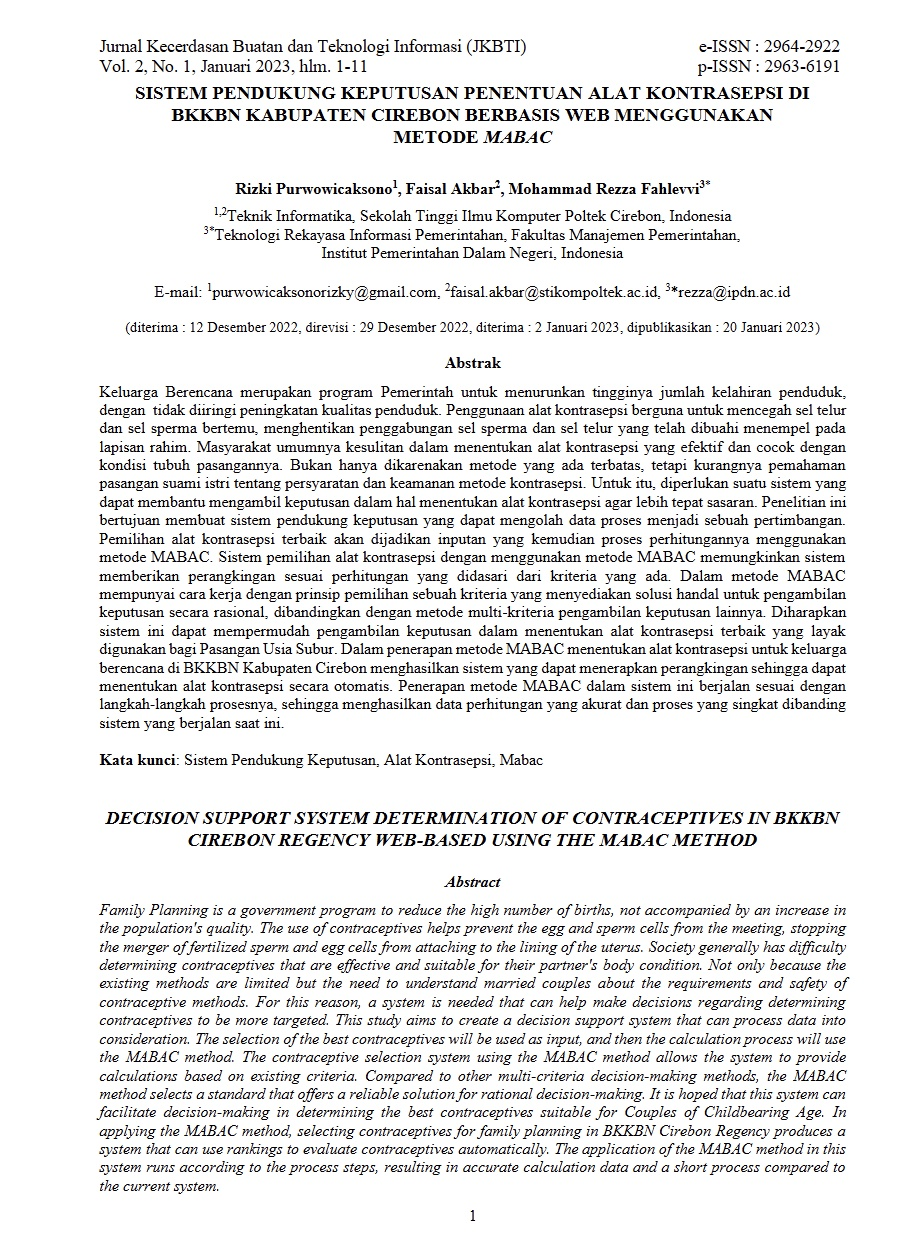

In [4]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'../runs/detect/predict4/*.jpg')[:10]:
  display(Image(filename=image_path, height=10))
  print('\n')

In [5]:
id2label = {0: "caption-image", 1:"image"}
detected = {0: list(), 1: list()}

In [6]:
import os
from PIL import Image

# Paths
label_dir = '../runs/detect/predict4/labels'
image_dir = '../runs/detect/predict4'

for label_path in glob.glob(os.path.join(label_dir, '*.txt')):
    image_name = os.path.splitext(os.path.basename(label_path))[0] + '.jpg'
    image_path = os.path.join(image_dir, image_name)

    img = Image.open(image_path)
    img_width, img_height = img.size

    with open(label_path, 'r') as f:
        lines = f.readlines()

    print(f"Image: {image_name}")
    for line in lines:
        print(line, end='')
        label, x_center, y_center, w, h, confidence = map(float, line.strip().split())

        x_min = int((x_center - w / 2) * img_width)
        y_min = int((y_center - h / 2) * img_height)
        x_max = int((x_center + w / 2) * img_width)
        y_max = int((y_center + h / 2) * img_height)

        obj = dict()
        obj['x_min'] = x_min
        obj['x_max'] = x_max
        obj['y_min'] = y_min
        obj['y_max'] = y_max
        obj['conf'] = confidence
        detected[label].append(obj)

        print(f"Class {int(label)}: (x_min={x_min}, y_min={y_min}), (x_max={x_max}, y_max={y_max})")
        print(f"Image width: {img_width}, image height: {img_height}")
        print()
    print("=====================================================================")


In [7]:
detected

{0: [], 1: []}

In [8]:
# import json
# with open('test_101.json','r') as file:
#     ocr_result = json.load(file)
# max_idx = len(ocr_result['text'])
# max_idx
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

image = Image.open(img_file_name)
ocr_result = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
ocr_result['text']

['',
 '',
 '',
 '',
 'Jumal',
 'Kecerdasan',
 'Buatan',
 'dan',
 'Teknologi',
 'Informasi',
 '(IKBTI)',
 'eISSN',
 ':',
 '2964-2922',
 '',
 'Vol.',
 '2,',
 'No.',
 '1,',
 'Januari',
 '2023,',
 'hlm.',
 '1-11',
 'p-ISSN',
 ':',
 '2963-6191',
 '',
 '',
 '',
 'SISTEM',
 'PENDUKUNG',
 'KEPUTUSAN',
 'PENENTUAN',
 'ALAT',
 'KONTRASEPSI',
 'DI',
 '',
 'BKKBN',
 'KABUPATEN',
 'CIREBON',
 'BERBASIS',
 'WEB',
 'MENGGUNAKAN',
 '',
 'METODE',
 'MABAC',
 '',
 '',
 '',
 'Rizki',
 'Purwowicaksono!,',
 'Faisal',
 'Akbar’,',
 'Mohammad',
 'Rezza',
 'Fahlevvi*™',
 '',
 '',
 '',
 'Teknik',
 'Informatika,',
 'Sekolah',
 'Tinggi',
 'Ilmu',
 'Komputer',
 'Poltek',
 'Cirebon,',
 'Indonesia',
 '',
 '3*Teknologi',
 'Rekayasa',
 'Informasi',
 'Pemerintahan,',
 'Fakultas',
 'Manajemen',
 'Pemerintahan_',
 '',
 'Institut',
 'Pemerintahan',
 'Dalam',
 'Negeri,',
 'Indonesia',
 '',
 '',
 '',
 'E-mail:',
 "'purwowicaksonorizky@gmail.com,",
 '“faisal.akbar@stikompoltek.ac.id,',
 '**rezza@ipdn.ac.id',
 '',
 '(diterima

In [9]:
def intersect_rect(image_obj, x_min2, x_max2, y_min2, y_max2):
    tolerance = 5
    x_min1, x_max1 = image_obj['x_min']+tolerance, image_obj['x_max']+tolerance
    y_min1, y_max1 = image_obj['y_min']+tolerance, image_obj['y_max']+tolerance

    return not ((x_max1 <= x_min2 or x_max2 <= x_min1) or
                (y_max1 <= y_min2 or y_max2 <= y_min1))

In [10]:
new_txt = ""
max_idx = len(ocr_result['text'])

# tdk append text dalam image yg kedetect ocr
for i in range(max_idx):
    is_img = False
    text = ocr_result['text'][i]

    for obj in detected[1]:
        print('masyk')
        x_min2 = ocr_result['left'][i]
        x_max2 = ocr_result['left'][i]+ocr_result['width'][i]
        y_min2 = ocr_result['top'][i]
        y_max2 = ocr_result['top'][i]+ocr_result['height'][i]

        if(intersect_rect(obj, x_min2, x_max2, y_min2, y_max2)): 
            is_img = True
            break
    
    if not is_img and text != "": new_txt += text + " "


In [11]:
new_txt

"Jumal Kecerdasan Buatan dan Teknologi Informasi (IKBTI) eISSN : 2964-2922 Vol. 2, No. 1, Januari 2023, hlm. 1-11 p-ISSN : 2963-6191 SISTEM PENDUKUNG KEPUTUSAN PENENTUAN ALAT KONTRASEPSI DI BKKBN KABUPATEN CIREBON BERBASIS WEB MENGGUNAKAN METODE MABAC Rizki Purwowicaksono!, Faisal Akbar’, Mohammad Rezza Fahlevvi*™ Teknik Informatika, Sekolah Tinggi Ilmu Komputer Poltek Cirebon, Indonesia 3*Teknologi Rekayasa Informasi Pemerintahan, Fakultas Manajemen Pemerintahan_ Institut Pemerintahan Dalam Negeri, Indonesia E-mail: 'purwowicaksonorizky@gmail.com, “faisal.akbar@stikompoltek.ac.id, **rezza@ipdn.ac.id (diterima : 12 Desember 2022, direvisi : 29 Desember 2022, diterima : 2 Januari 2023, dipublikasikan : 20 Januari 2023) Abstrak Keluarga Berencana merupakan program Pemerintah untuk menurunkan tingginya jumlah kelahiran penduduk, dengan tidak diiringi peningkatan kualitas penduduk. Penggunaan alat kontrasepsi berguna untuk mencegah sel telur dan sel sperma bertemu, menghentikan penggabunga

In [12]:
caption_img = [] #{caption: no urut caption, img: no urut img}: dict
img_used = {} #utk track img apakah udah dipakai atau belum

for id, caption in enumerate(detected[0]):
    y_min_c, y_max_c = caption['y_min'], caption['y_max']
    min_val = 1e5
    min_idx = -1

    for idx, img in enumerate(detected[1]):
        y_min_img, y_max_img = img['y_min'], img['y_max']

        # caption di atas img
        diff_up = abs(y_min_img-y_max_c)
        # kalau caption di bawah img
        diff_down = abs(y_min_c - y_max_img)
        
        if(diff_up < diff_down): 
            if diff_up < min_val: 
                min_val = diff_up
                min_idx = idx
        else: 
            if diff_down < min_val: 
                min_val = diff_down
                min_idx = idx
    
    print(id, min_val, min_idx)

    #caption lebih byk dari img
    if(min_idx in img_used):
        if(min_val < img_used[min_idx]['value']):
            prev_caption_idx = img_used[min_idx]['caption']
            caption_img[prev_caption_idx]['img'] = None
    
    caption_img.append({"caption":id, "img":min_idx}) 
    img_used[min_idx] = {"caption":id, "value":min_val}

# img lbih byk dri caption
for image_id, image in enumerate(detected[1]):
    if image_id not in img_used:
        caption_img.append({"caption":None, "img":image_id}) 

# cleaning, utamain img
caption_img = [record for record in caption_img if record["img"] is not None]
caption_img

[]

In [13]:
from figure import Figure

figure_list = []

# get kata2 captionnya
for obj in caption_img:
    # get position caption
    caption = detected[0][obj['caption']]
    img = detected[1][obj['img']]
    caption_txt = ""

    for i in range(max_idx):
        x_min2 = ocr_result['left'][i]
        x_max2 = ocr_result['left'][i]+ocr_result['width'][i]
        y_min2 = ocr_result['top'][i]
        y_max2 = ocr_result['top'][i]+ocr_result['height'][i]

        if(intersect_rect(caption, x_min2, x_max2, y_min2, y_max2)): 
            text = ocr_result['text'][i]
            if text != "": caption_txt += text + " "

    figure_list.append(Figure(caption, img, caption_txt, img_file_name))

In [14]:
for fig in figure_list:
    print(fig)

In [15]:
from jiwer import wer, cer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

In [16]:
with open('../data/raw/ground_truth/gt_1.txt') as file:
    gt = file.read()
with open('../data/raw/ocr_result/ocr_1.txt') as file:
    baseline = file.read()

In [17]:
refined = new_txt.replace('\n', ' ')
print(refined)

# refined = """PENDAHULUAN Neuropedagogi adalah —_kajian interdisipliner yang menggabungkan tiga bidang ilmu  yaang telah ada dan berkembang sebelumnya, yaitu bidang kajian —psikologi, neurosains. dan pendidikan. (Chojak, 2018). Neuropedagogi dapat didefinisikan sebagai bidang ilmu sosial dan termasuk disiplin ilmu yang berkaitan dengan perkembangan dan perubahan dalam ~—_mekanisme pendidikan di seluruh kehidupan manusia. Gambar 1. Diagram interdisiplin kajian neuropedagogi. Sumber: Chojak (2018). Gambar tersebut merupakan gambar sebuah diagram Venn. Neuropedagogis bertujuan untuk menciptakan peningkatan pembelajaran melalui inisiatif —pendidik untuk menggunakan penemuan tentang belajar, memori, bahasa, dan daerah lain dalam struktur kognitif siswa, sehingga pendidik dapat menciptakan strategi terbaik untuk mengajar dan belajar. Dengan demikian, tugas-tugas neuropedagogi —_harus mencakup: (i) Mengumpulkan informasi tentang kondisi neurobiologis dari realitas pendidikan; (ii) Analisis realitas, hubungan dan ketergantungan di dalamnya; (3) menyebarkan pengetahuan yang diperoleh untuk tujuan transformasi realitas seperti itu. Studi penelitian —_tentang perkembangan otak dan perkembangan emosional  anak-anak = menunjukkan pentingnya tahun-tahun awal dalam pertumbuhan dan perkembangan anak dan kehidupan mereka di masa depan (Bergen dan Woodin, 2017). Saat itu. temuan penelitian terkait dengan perkembangan otak dan emosi anak terintegrasi dengan masalah-masalah penting pedagogi, suatu keilmuandialog antara guru kelas dan abli saraf diharapkan muncul dengan niat mengeksplorasi kemungkinan untuk memulai arah baru dalam pedagogi (Nouri, 2016). METODOLOGI PENELITIAN Penulisan artikel ini menggunakan pendekatan studi pustaka (literature review). Literature review bertujuan untuk mengidentifikasi, menilai, dan menginterpretasi_seluruh temuan-temuan pada suatu topik penelitian, untuk menjawab pertanyaan penelitian (research question) yang telah ditetapkan sebelumnya (Kitchenham & Charters, 2007). Dalam penelitian ini dipilih sebanyak dua puluh artikel antara tahun 2015-2019 yang diambil dari sumber google scholars mengenai topik neuropedagogi dalam pendidikan. HASIL PENELITIAN DAN PEMBAHASAN Konsep neuropedagogi merupakan topik yang sudah_~—cukup —_lama diperbincangkan, dalam artikel ini ditelaah tren penelitian neuropedagogi antara tahun 2015 hingga tahun 2019. Pada tahun 2015, Silva Lopez dkk melakukan pengembangan pembelajaran berbasis neuropedagogi yang dikenal dengan Techno Neuro Pedagogy System (TNPS), yaitu suatu sistem yang terdiri dari 8 fase: analisis, desain, pengembangan, pengujian, implementasi, dokumentasi, pemeliharaan, dan evaluasi. TNPS tergabung dalam model siklus hidup perangkat lunak — tambahan — dan pengembangan iteratif yang merupakan bagian penting dari rekayasa perangkat lunak. TNPS mengintegrasikan pendidikan, Nurosains, dan teknologi dimensi, yang"""
# print(refined)

Jumal Kecerdasan Buatan dan Teknologi Informasi (IKBTI) eISSN : 2964-2922 Vol. 2, No. 1, Januari 2023, hlm. 1-11 p-ISSN : 2963-6191 SISTEM PENDUKUNG KEPUTUSAN PENENTUAN ALAT KONTRASEPSI DI BKKBN KABUPATEN CIREBON BERBASIS WEB MENGGUNAKAN METODE MABAC Rizki Purwowicaksono!, Faisal Akbar’, Mohammad Rezza Fahlevvi*™ Teknik Informatika, Sekolah Tinggi Ilmu Komputer Poltek Cirebon, Indonesia 3*Teknologi Rekayasa Informasi Pemerintahan, Fakultas Manajemen Pemerintahan_ Institut Pemerintahan Dalam Negeri, Indonesia E-mail: 'purwowicaksonorizky@gmail.com, “faisal.akbar@stikompoltek.ac.id, **rezza@ipdn.ac.id (diterima : 12 Desember 2022, direvisi : 29 Desember 2022, diterima : 2 Januari 2023, dipublikasikan : 20 Januari 2023) Abstrak Keluarga Berencana merupakan program Pemerintah untuk menurunkan tingginya jumlah kelahiran penduduk, dengan tidak diiringi peningkatan kualitas penduduk. Penggunaan alat kontrasepsi berguna untuk mencegah sel telur dan sel sperma bertemu, menghentikan penggabungan

In [18]:
baseline = baseline.replace('\n', ' ')
print(baseline)

Jumal Kecerdasan Buatan dan Teknologi Informasi (IKBTI) eISSN : 2964-2922 Vol. 2, No. 1, Januari 2023, hlm. 1-11 p-ISSN : 2963-6191  SISTEM PENDUKUNG KEPUTUSAN PENENTUAN ALAT KONTRASEPSI DI BKKBN KABUPATEN CIREBON BERBASIS WEB MENGGUNAKAN METODE MABAC  Rizki Purwowicaksono!, Faisal Akbar’, Mohammad Rezza Fahlevvi*™  Teknik Informatika, Sekolah Tinggi Ilmu Komputer Poltek Cirebon, Indonesia 3*Teknologi Rekayasa Informasi Pemerintahan, Fakultas Manajemen Pemerintahan_ Institut Pemerintahan Dalam Negeri, Indonesia  E-mail: 'purwowicaksonorizky@gmail.com, “faisal.akbar@stikompoltek.ac.id, **rezza@ipdn.ac.id (diterima : 12 Desember 2022, direvisi : 29 Desember 2022, diterima : 2 Januari 2023, dipublikasikan : 20 Januari 2023)  Abstrak  Keluarga Berencana merupakan program Pemerintah untuk menurunkan tingginya jumlah kelahiran penduduk, dengan tidak diiringi peningkatan kualitas penduduk. Penggunaan alat kontrasepsi berguna untuk mencegah sel telur dan sel sperma bertemu, menghentikan pengga

In [19]:
gt = gt.replace('\n', ' ')
print(gt)

Jurnal Kecerdasan Buatan dan Teknologi Informasi (JKBTI)  Vol. 2, No. 1, Januari 2023, hlm. 1-11  eISSN : 2964-2922  p-ISSN : 2963-6191  SISTEM PENDUKUNG KEPUTUSAN PENENTUAN ALAT KONTRASEPSI DI BKKBN KABUPATEN CIREBON BERBASIS WEB MENGGUNAKAN METODE MABAC  Rizki Purwowicaksono1, Faisal Akbar2, Mohammad Rezza Fahlevvi3  Teknik Informatika, Sekolah Tinggi Ilmu Komputer Poltek Cirebon, Indonesia Teknologi Rekayasa Informasi Pemerintahan, Fakultas Manajemen Pemerintahan, Institut Pemerintahan Dalam Negeri, Indonesia  E-mail: purwowicaksonorizky@gmail.com, faisal.akbar@stikompoltek.ac.id, rezza@ipdn.ac.id (diterima : 12 Desember 2022, direvisi : 29 Desember 2022, diterima : 2 Januari 2023, dipublikasikan : 20 Januari 2023)  Abstrak Keluarga  Berencana  merupakan  program Pemerintah  untuk menurunkan  tingginya  jumlah  kelahiran  penduduk, dengan tidakdiiringi peningkatan kualitas penduduk.Penggunaan alat kontrasepsi berguna untuk mencegah sel telur dan  sel  sperma  bertemu,  menghentikan 

In [20]:
baseline == refined

False

In [21]:
wer_baseline = wer(gt, baseline)
wer_refined = wer(gt, refined)
cer_baseline = cer(gt, baseline)
cer_refined = cer(gt, refined)

# BLEU
smooth = SmoothingFunction().method4
bleu_baseline = sentence_bleu([gt.split()], baseline.split(), smoothing_function=smooth)
bleu_refined = sentence_bleu([gt.split()], refined.split(), smoothing_function=smooth)

# Cosine Similarity
vectorizer = TfidfVectorizer().fit([gt, baseline, refined])
tfidf = vectorizer.transform([gt, baseline, refined])
cos_baseline = cosine_similarity(tfidf[0], tfidf[1])[0][0]
cos_refined = cosine_similarity(tfidf[0], tfidf[2])[0][0]

print("WER:", wer_baseline, wer_refined)
print("CER:", cer_baseline, cer_refined)
print("BLEU:", bleu_baseline, bleu_refined)
print("Cosine:", cos_baseline, cos_refined)

WER: 0.054009819967266774 0.054009819967266774
CER: 0.05248906477817122 0.0535305144761508
BLEU: 0.909533270820411 0.909533270820411
Cosine: 0.991278824751164 0.991278824751164
